In [1]:
#Import the needed packages
import pandas as pd 
import matplotlib.pyplot as plt

# Exploratory Data Analysis (EDA)

In [2]:
#Read the data in
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


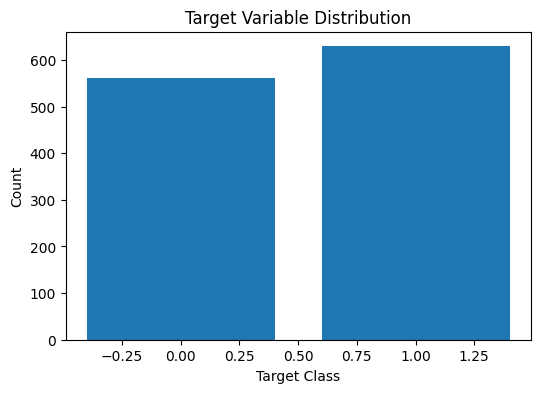

In [6]:
#Understand the target variable
#Plot the distribution of the target variable
target_counts = df['target'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Variable Distribution')
plt.show()

In [7]:
# Clean the Data
# Check for missing values
print(df.isnull().sum())
# Fill or drop missing values
# df.fillna(method='ffill', inplace=True)  # Example

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


C:\Users\bhavy\AppData\Local\Temp\ipykernel_20156\4241546495.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


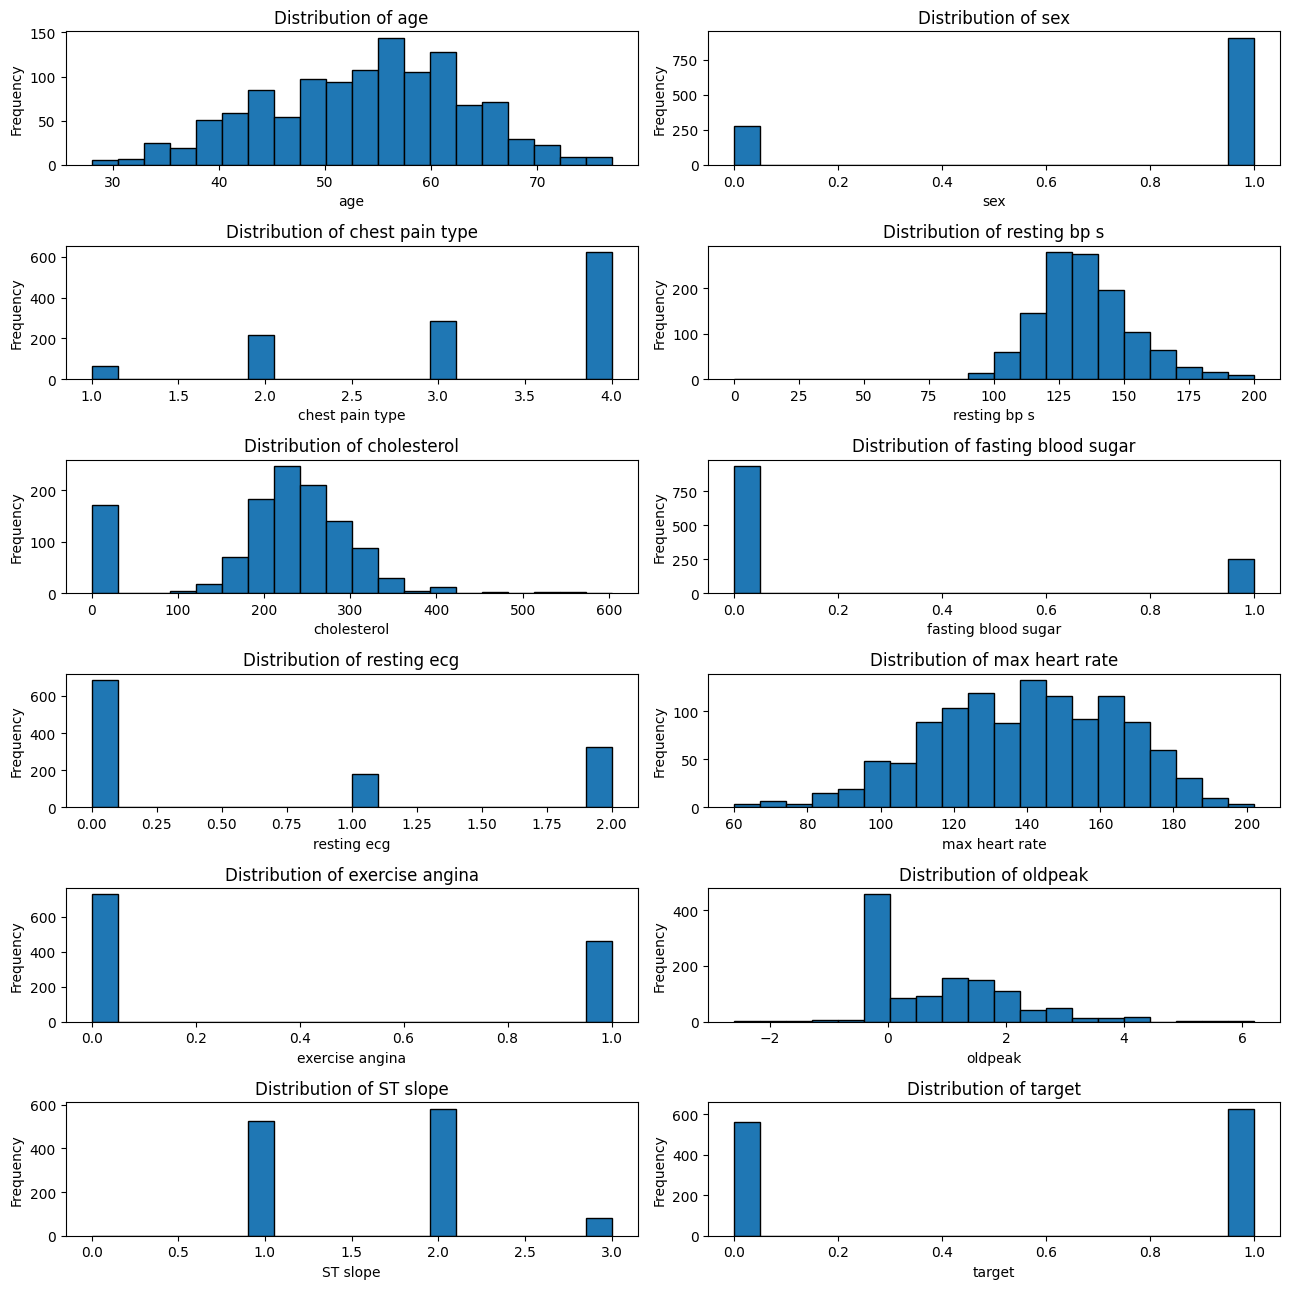

In [8]:
# Plot distributions for each continuous feature
fig,axes = plt.subplots(6,2,figsize=(13,13),constrained_layout=True)
axes = axes.flatten()
continuous_features = df.select_dtypes(include=['int64', 'float64']).columns
for i, column in enumerate(continuous_features):
    ax = axes[i]
    ax.hist(df[column], bins=20, edgecolor='k')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [9]:
# Plot distributions for each categorical feature
''' 
categorical_features = df.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure(figsize=(6, 4))
    df[column].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show() 
'''

" \ncategorical_features = df.select_dtypes(include=['object']).columns\nfor column in categorical_features:\n    plt.figure(figsize=(6, 4))\n    df[column].value_counts().plot(kind='bar', edgecolor='k')\n    plt.title(f'Distribution of {column}')\n    plt.xlabel(column)\n    plt.ylabel('Count')\n    plt.show() \n"

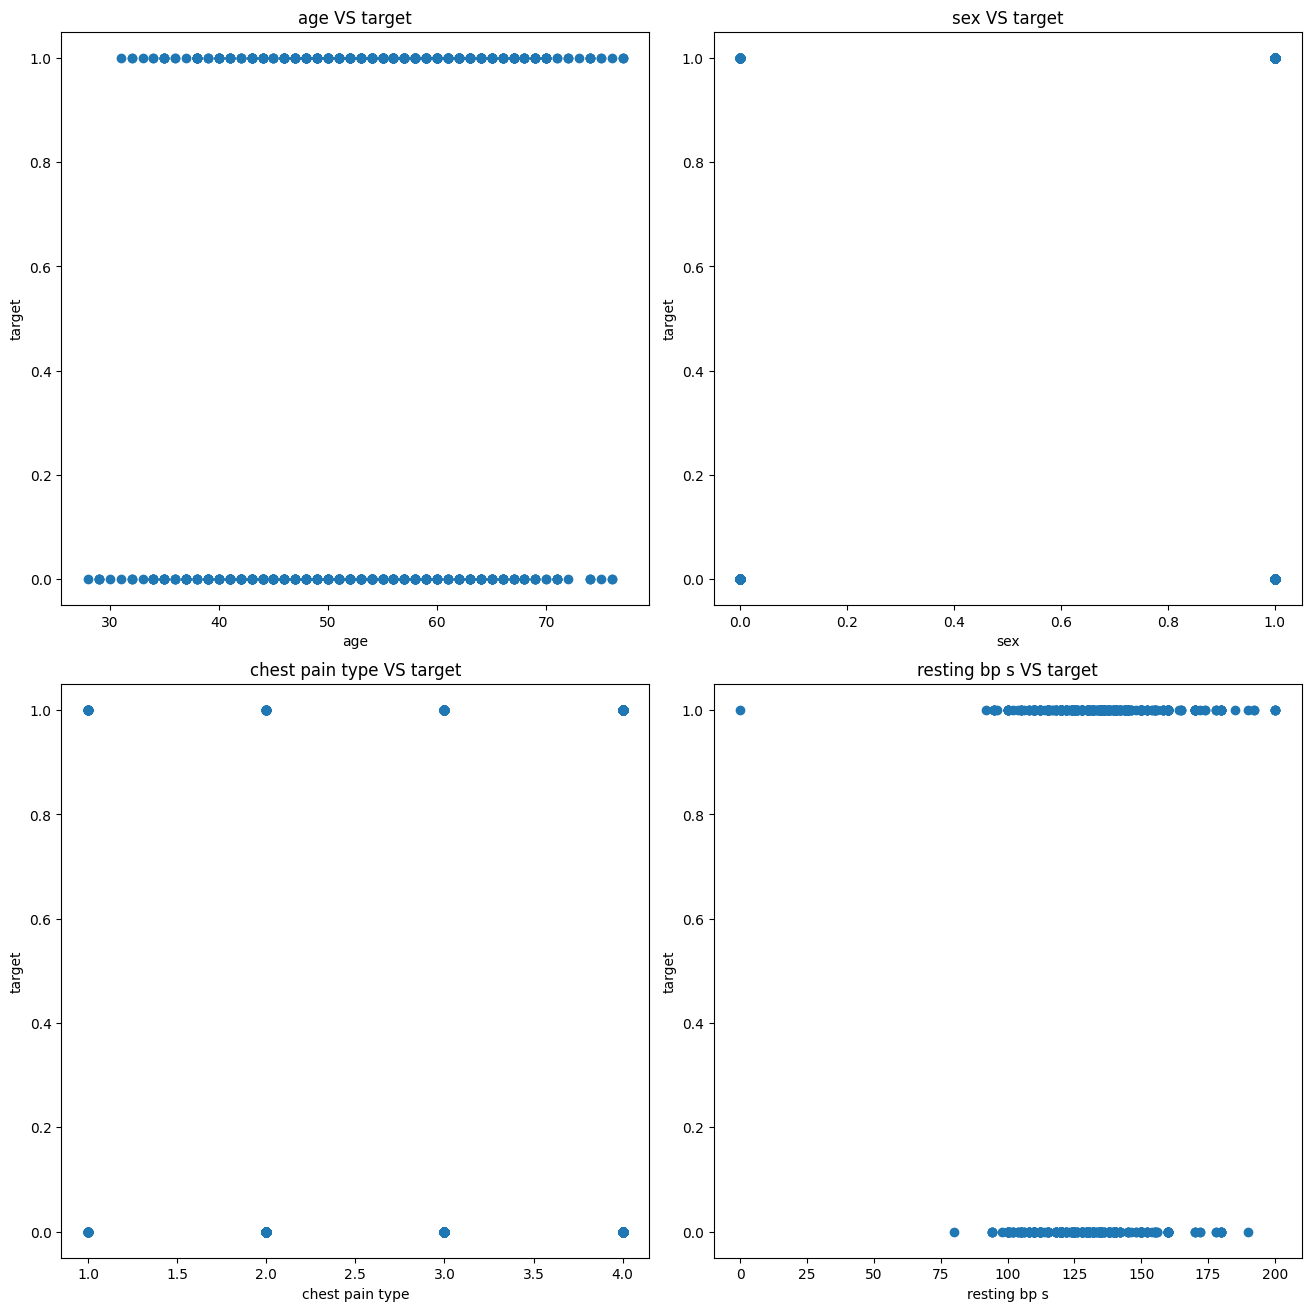

In [10]:
fig,ax=plt.subplots(2,2,figsize=(13,13),constrained_layout=True)
ax[0,0].scatter(df['age'], df['target'])
ax[0,0].set_title('age VS target')
ax[0,0].set_xlabel('age')
ax[0,0].set_ylabel('target')
ax[0,0].set
ax[0,1].scatter(df['sex'], df['target'])
ax[0,1].set_title('sex VS target')
ax[0,1].set_xlabel('sex')
ax[0,1].set_ylabel('target')
ax[0,1].set
ax[1,0].scatter(df['chest pain type'], df['target'])
ax[1,0].set_title('chest pain type VS target')
ax[1,0].set_xlabel('chest pain type')
ax[1,0].set_ylabel('target')
ax[1,0].set
ax[1,1].scatter(df['resting bp s'], df['target'])
ax[1,1].set_title('resting bp s VS target')
ax[1,1].set_xlabel('resting bp s')
ax[1,1].set_ylabel('target')
ax[1,1].set
plt.show()

In [11]:
df.shape

(1190, 12)

## Data Preprocessing

## Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
X_train

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
918,60,1,4,117,230,1,0,160,1,1.4,1
825,64,1,3,125,309,0,0,131,1,1.8,2
2,37,1,2,130,283,0,1,98,0,0.0,1
503,69,1,4,140,208,0,1,140,1,2.0,2
790,68,0,3,120,211,0,2,115,0,1.5,2
...,...,...,...,...,...,...,...,...,...,...,...
390,61,1,4,160,0,1,1,145,0,1.0,2
1043,51,1,4,140,299,0,0,173,1,1.6,1
725,59,1,4,140,177,0,0,162,1,0.0,1
35,32,1,2,125,254,0,0,155,0,0.0,1


In [15]:
X_test

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
1048,77,1,4,125,304,0,2,162,1,0.0,1
713,66,1,4,120,302,0,2,151,0,0.4,2
511,60,1,4,136,195,0,0,126,0,0.3,1
536,56,1,4,130,0,0,2,122,1,1.0,2
1026,51,1,3,125,245,1,2,166,0,2.4,2
...,...,...,...,...,...,...,...,...,...,...,...
822,52,1,1,152,298,1,0,178,0,1.2,2
964,51,0,3,140,308,0,2,142,0,1.5,1
432,62,1,4,120,220,0,1,86,0,0.0,1
1030,64,1,3,125,309,0,0,131,1,1.8,2


## Normalization/Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [19]:
X_train[numerical_features]

,age,resting bp s,cholesterol,max heart rate,oldpeak
918,0.688974,-0.830285,0.186960,0.806335,0.410575
825,1.116204,-0.391309,0.970207,-0.333575,0.771987
2,-1.767593,-0.116949,0.712429,-1.630713,-0.854368
503,1.650240,0.431771,-0.031160,0.020190,0.952693
790,1.543433,-0.665669,-0.001416,-0.962490,0.500928
...,...,...,...,...,...
390,0.795782,1.529211,-2.093381,0.216727,0.049163
1043,-0.272291,0.431771,0.871062,1.317329,0.591281
725,0.582167,0.431771,-0.338510,0.884950,-0.854368
35,-2.301630,-0.391309,0.424908,0.609799,-0.854368


In [20]:
X_test[numerical_features]

,age,resting bp s,cholesterol,max heart rate,oldpeak
1048,2.504698,-0.391309,0.920634,0.884950,-0.854368
713,1.329818,-0.665669,0.900805,0.452570,-0.492956
511,0.688974,0.212283,-0.160049,-0.530111,-0.583309
536,0.261745,-0.116949,-2.093381,-0.687340,0.049163
1026,-0.272291,-0.391309,0.335677,1.042178,1.314106
...,...,...,...,...,...
822,-0.165484,1.090235,0.861147,1.513865,0.229869
964,-0.272291,0.431771,0.960293,0.098805,0.500928
432,0.902589,-0.665669,0.087814,-2.102400,-0.854368
1030,1.116204,-0.391309,0.970207,-0.333575,0.771987


## Modelling

## DecisionTree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf

DecisionTreeClassifier(random_state=0)

In [23]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
y_pred=clf.predict(X_test)

In [25]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8739495798319328

## Stochastic Gradient Descent

In [28]:
from sklearn.linear_model import SGDClassifier
clf_GD = SGDClassifier()
clf_GD

SGDClassifier()

In [29]:
clf_GD.fit(X_train,y_train)

SGDClassifier()

In [31]:
y_pred_GD = clf_GD.predict(X_test)
y_pred_GD

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GD)

0.8739495798319328

## Neural Network Models

In [35]:
from sklearn.neural_network import MLPClassifier 
clf_MLP = MLPClassifier()
clf_MLP

MLPClassifier()

In [36]:
clf_MLP.fit(X_train,y_train)

C:\Users\bhavy\.conda\envs\HeartDisease\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [37]:
y_pred_MLP = clf_MLP.predict(X_test)
y_pred_MLP

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_MLP)

0.8739495798319328